In [2]:
import pandas as pd
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from tensorflow.keras.layers import Dense, Dropout, Flatten # core layers
from tensorflow.keras.optimizers import Adam

from keras.layers.normalization import BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical

from keras.datasets import mnist

In [ ]:
# 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

In [4]:
data_face = pd.read_csv('fer2013.csv')
data_face

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [29]:
data_train = data_face[data_face['Usage'] == 'Training']
data_train = data_train.drop(columns = ['Usage'])
data_pub_test = data_face[data_face['Usage'] == 'PublicTest']
data_pub_test = data_pub_test.drop(columns = ['Usage'])
data_pri_test = data_face[data_face['Usage'] == 'PrivateTest']
data_pri_test = data_pri_test.drop(columns = ['Usage'])

In [30]:
data_train.shape, data_pub_test.shape, data_pri_test.shape

((28709, 2), (3589, 2), (3589, 2))

In [6]:
def emo_face(data, loc):
    x = data['pixels'][loc].split(' ')
    arr = np.empty((48, 48))
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            arr[i][j] = x[48*i+j]
    plt.matshow(arr)

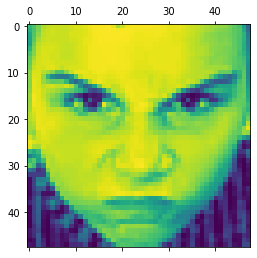

In [10]:
emo_face(data_train, 342)

In [28]:
data_face['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [34]:
pd.get_dummies(data_train['emotion']).values

numpy.ndarray

In [48]:
def getData(data):
    img_str = data['pixels'].tolist()
    faces = []
    for img in img_str:
        face = np.array(img.split(' ')).reshape((48, 48))
        face = cv2.resize(face.astype('uint8'), (48, 48))
        faces.append(face.astype('float32'))
    faces = np.array(faces)
    faces = np.expand_dims(faces, -1)
    emotions = pd.get_dummies(data['emotion']).values
    
    return faces, emotions

In [49]:
X_train, y_train = getData(data_train)
X_val, y_val = getData(data_pub_test)
X_test, y_test = getData(data_pri_test)
print('X_train: ', X_train.shape, '\t y_train: ', y_train.shape)
print('X_val: ', X_val.shape, '\t y_val: ', y_val.shape)
print('X_test: ', X_test.shape, '\t y_test: ', y_test.shape)

X_train:  (28709, 48, 48, 1) 	 y_train:  (28709, 7)
X_val:  (3589, 48, 48, 1) 	 y_val:  (3589, 7)
X_test:  (3589, 48, 48, 1) 	 y_test:  (3589, 7)


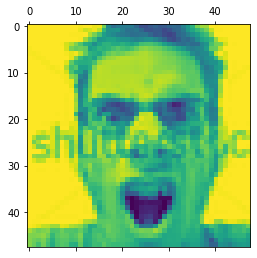

In [27]:
plt.matshow(faces[23423])

In [12]:
len(data_train['pixels'].tolist())

28709

In [43]:
def load_fer2013():
        data = pd.read_csv('fer2013.csv')
        pixels = data['pixels'].tolist()
        width, height = image_size
        
        faces = []
        for pixel_sequence in pixels:
            face = [int(pixel) for pixel in pixel_sequence.split(' ')]
            face = np.array(face).reshape(width, height)
            face = cv2.resize(face.astype('uint8'),image_size)
            faces.append(face.astype('float32'))
        faces = np.array(faces)
        faces = np.expand_dims(faces, -1)
        emotions = pd.get_dummies(data['emotion']).values
        return faces, emotions

In [46]:
image_size=(48,48)

a, b = load_fer2013()

In [47]:
a.shape

(35887, 48, 48, 1)